### Replication a digital option with a payoff at maturity \$T=1\$, 
### $$ 1_{L<S_{T}<U} $$
### where \$L = 80 \$ and \$U = 120\$ are the lower and upper barrier.

### We can replicate it successfully buy short Long an European call option with strike of \$80-\epsilon\$ and short a call with strike \$80+\epsilon\$. And also short an European put (or call) option with strike of  \$120-\epsilon\$ and long a put  (or call) with strike of \$120+\epsilon\$. All the options we trade are at maturity T = 1.

### The Black-Scholes delta and vega profile of the spread are plotted as follows.

### $$ delta_{call} =  e^{-qT}N(d_{1})$$
### where $d_{1}=\frac{ln(F_{0}/K)+\frac{1}{2}\sigma^2T}{\sigma\sqrt{T}}$
### $$ delta_{put} = delta_{call}-e^{-qT} $$
### $q$ is the dividend rate of the underlying asset.
### $$vega_{call}=vega_{put}= e^{-qT}S_{0}\sqrt{T}\phi(d_{1})$$

In [1]:
from enum import Enum
import math
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class PayoffType(str, Enum):
    Call = 'Call'
    Put = 'Put'

def delta(r, q, vol, K, T, S, payoffType):
    F = S * math.exp((r + q) * T)
    d1 = (math.log(F / K) + 0.5 * vol * vol * T) / (vol * math.sqrt(T))
    d2 = d1 - vol * math.sqrt(T)
    if payoffType == PayoffType.Call:
        delta_call = math.exp(-q * T) * norm.cdf(d1)
        return delta_call
    elif payoffType == PayoffType.Put:
        delta_put = math.exp(-q * T) * norm.cdf(d1) - math.exp(-q * T)
        return delta_put

def vega(r, q, vol, K, T, S):
    F = S * math.exp((r + q) * T)
    d1 = (math.log(F / K) + 0.5 * vol * vol * T) / (vol * math.sqrt(T))
    return math.exp(-q * T) * S * math.sqrt(T) * norm.pdf(d1)

S_list = [i for i in np.arange(20.0, 240.0, 0.1)]
delta_profile = pd.DataFrame(index = S_list, columns = ['Call_79', 'Call_81', 'Call_119', 'Call_121'])
r, q, vol, T = 0.0, 0.0, 0.2, 1.0
K_list = [79, 81, 119, 121]
call79 = []
call81 = []
call119 = []
call121 = []
for K in K_list:
    if K == 79:
        for S in S_list:
            d79 = delta(r, q, vol, K, T, S, PayoffType.Call)
            call79.append(d79)
    elif K == 81:
        for S in S_list:
            d81 = - delta(r, q, vol, K, T, S, PayoffType.Call)
            call81.append(d81)
    elif K == 119:
        for S in S_list:
            d119 = -delta(r, q, vol, K, T, S, PayoffType.Put) #or call
            call119.append(d119)
    elif K == 121:
        for S in S_list:
            d121 = delta(r, q, vol, K, T, S, PayoffType.Put) #or call
            call121.append(d121)
delta_profile['Call_79'] = call79
delta_profile['Call_81'] = call81
delta_profile['Call_119'] = call119
delta_profile['Call_121'] = call121
delta_profile['Call_Put_Spread'] = delta_profile['Call_79'] + delta_profile['Call_81'] + delta_profile['Call_119'] + delta_profile['Call_121'] 

vega_profile = pd.DataFrame(index = S_list, columns = ['Call_79', 'Call_81', 'Call_119', 'Call_121'])
v1 = []
v2 = []
v3 = []
v4 = []

for K in K_list:
    if K == 79:
        for S in S_list:
            v = vega(r, q, vol, K, T, S)
            v1.append(v)
    elif K == 81:
        for S in S_list:
            v = - vega(r, q, vol, K, T, S)
            v2.append(v)
    elif K == 119:
        for S in S_list:
            v = -vega(r, q, vol, K, T, S)
            v3.append(v)
    elif K == 121:
        for S in S_list:
            v =  vega(r, q, vol, K, T, S)
            v4.append(v)
            
vega_profile['Call_79'] = v1
vega_profile['Call_81'] = v2
vega_profile['Call_119'] = v3
vega_profile['Call_121'] = v4
vega_profile['Call_Put_Spread'] = vega_profile['Call_79'] + vega_profile['Call_81'] + vega_profile['Call_119'] + vega_profile['Call_121']

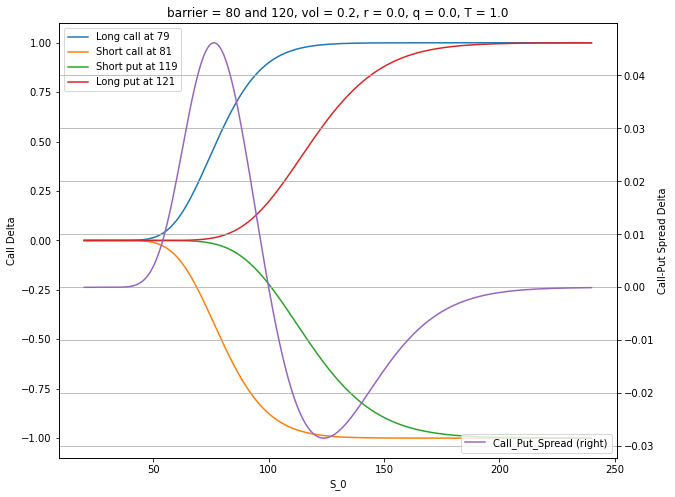

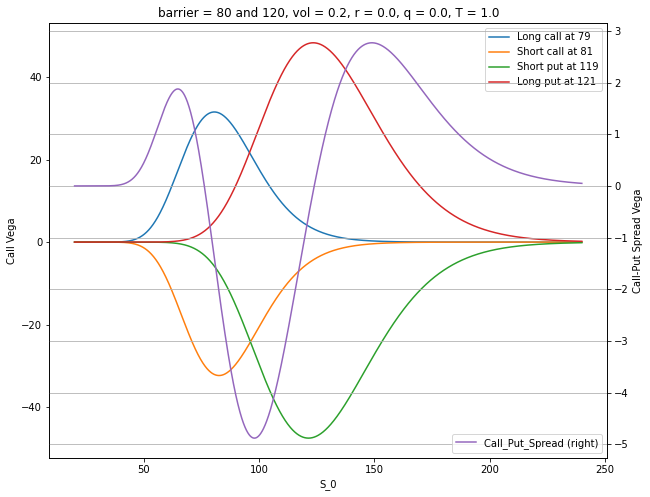

In [2]:
plt.figure(figsize = (10, 8)
          )
plt.plot(delta_profile['Call_79'], 
        label = 'Long call at 79')

plt.plot(delta_profile['Call_81'], 
        label = 'Short call at 81')

plt.plot(delta_profile['Call_119'], 
        label = 'Short put at 119')

plt.plot(delta_profile['Call_121'], 
        label = 'Long put at 121')

plt.legend(loc = 'upper right')
plt.grid()
plt.ylabel('Call Delta')
plt.xlabel('S_0')

delta_profile['Call_Put_Spread'].plot(secondary_y = True)
plt.legend(loc = 'lower right')
plt.title('barrier = 80 and 120, vol = 0.2, r = 0.0, q = 0.0, T = 1.0')
plt.grid()
plt.ylabel('Call-Put Spread Delta')
plt.show();

plt.figure(figsize = (10, 8)
          )
plt.plot(vega_profile['Call_79'], 
        label = 'Long call at 79')

plt.plot(vega_profile['Call_81'], 
        label = 'Short call at 81')

plt.plot(vega_profile['Call_119'], 
        label = 'Short put at 119')

plt.plot(vega_profile['Call_121'], 
        label = 'Long put at 121')

plt.legend(loc = 'upper right')
plt.grid()
plt.ylabel('Call Vega')
plt.xlabel('S_0')

vega_profile['Call_Put_Spread'].plot(secondary_y = True)
plt.legend(loc = 'lower right')
plt.title('barrier = 80 and 120, vol = 0.2, r = 0.0, q = 0.0, T = 1.0')
plt.grid()
plt.ylabel('Call-Put Spread Vega')
plt.show();